<IPython.core.display.Javascript object>


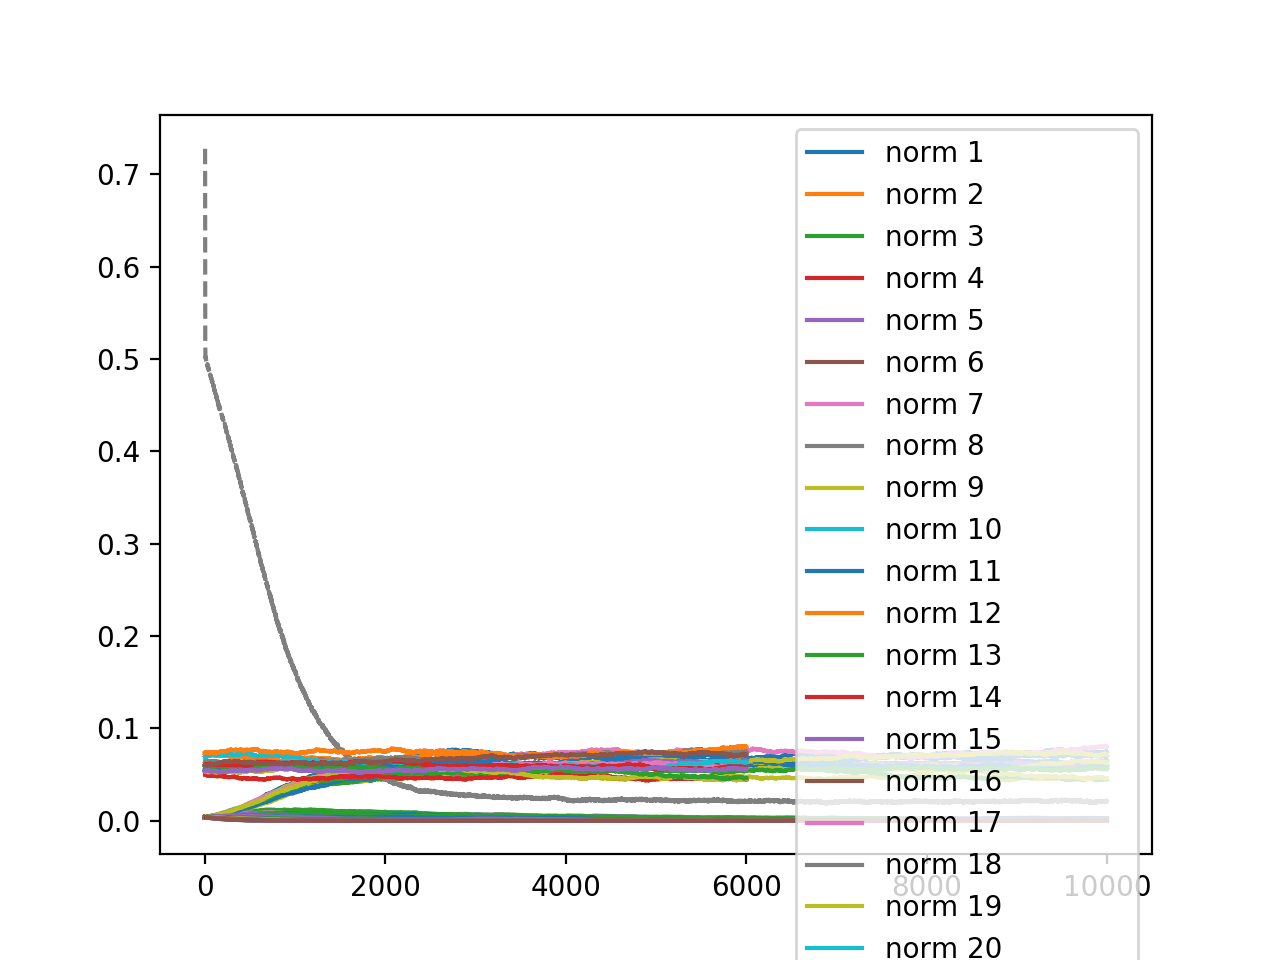

In [14]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.animation as animation
%matplotlib notebook

import julia
J= julia.Julia()
J.include("populationSimulationSimple.jl")

stats, imageMatrix = J.evolve()

fig = plt.figure()

ax1 = plt.subplot(1,1,1)

for i in range(256):
	line = []
	for stat in stats:
		line.append(stat[0][i])

	plt.plot(line, label = "norm " + str(i+1))

coops = [stat[1] for stat in stats]
plt.plot(coops, label="Cooperation Rate", color="grey", linestyle="dashed")

# plt.legend()


In [4]:
len(stats)

2500

Below is a plot of all same type individuals starting with the same initial conditions as the two type simulations. Stern judging evolves.

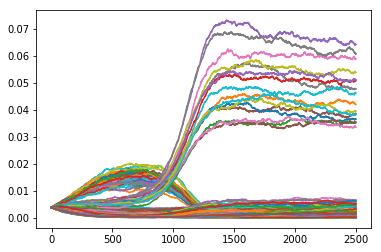

In [5]:
norms = J.NORMS
len(norms)
for i in range(256):
	line = []
	for stat in stats:
		line.append(stat[0][i])

	plt.plot(line, label = "norm " + str(i+1))

In [13]:
normInds = [i for i,r in enumerate(stats[2000][0]) if r > 0.03]
print(normInds)
for i in normInds:
    print("Norm " + str(i))
    print(norms[i][0])
    print(norms[i][1])

[0, 2, 8, 10, 32, 34, 40, 42, 128, 130, 136, 138, 160, 162, 168]
Norm 0
[[0 0]
 [0 0]]
[[0 0]
 [0 0]]
Norm 2
[[0 0]
 [0 0]]
[[0 1]
 [0 0]]
Norm 8
[[0 0]
 [0 0]]
[[0 0]
 [0 1]]
Norm 10
[[0 0]
 [0 0]]
[[0 1]
 [0 1]]
Norm 32
[[0 1]
 [0 0]]
[[0 0]
 [0 0]]
Norm 34
[[0 1]
 [0 0]]
[[0 1]
 [0 0]]
Norm 40
[[0 1]
 [0 0]]
[[0 0]
 [0 1]]
Norm 42
[[0 1]
 [0 0]]
[[0 1]
 [0 1]]
Norm 128
[[0 0]
 [0 1]]
[[0 0]
 [0 0]]
Norm 130
[[0 0]
 [0 1]]
[[0 1]
 [0 0]]
Norm 136
[[0 0]
 [0 1]]
[[0 0]
 [0 1]]
Norm 138
[[0 0]
 [0 1]]
[[0 1]
 [0 1]]
Norm 160
[[0 1]
 [0 1]]
[[0 0]
 [0 0]]
Norm 162
[[0 1]
 [0 1]]
[[0 1]
 [0 0]]
Norm 168
[[0 1]
 [0 1]]
[[0 0]
 [0 1]]


<IPython.core.display.Javascript object>


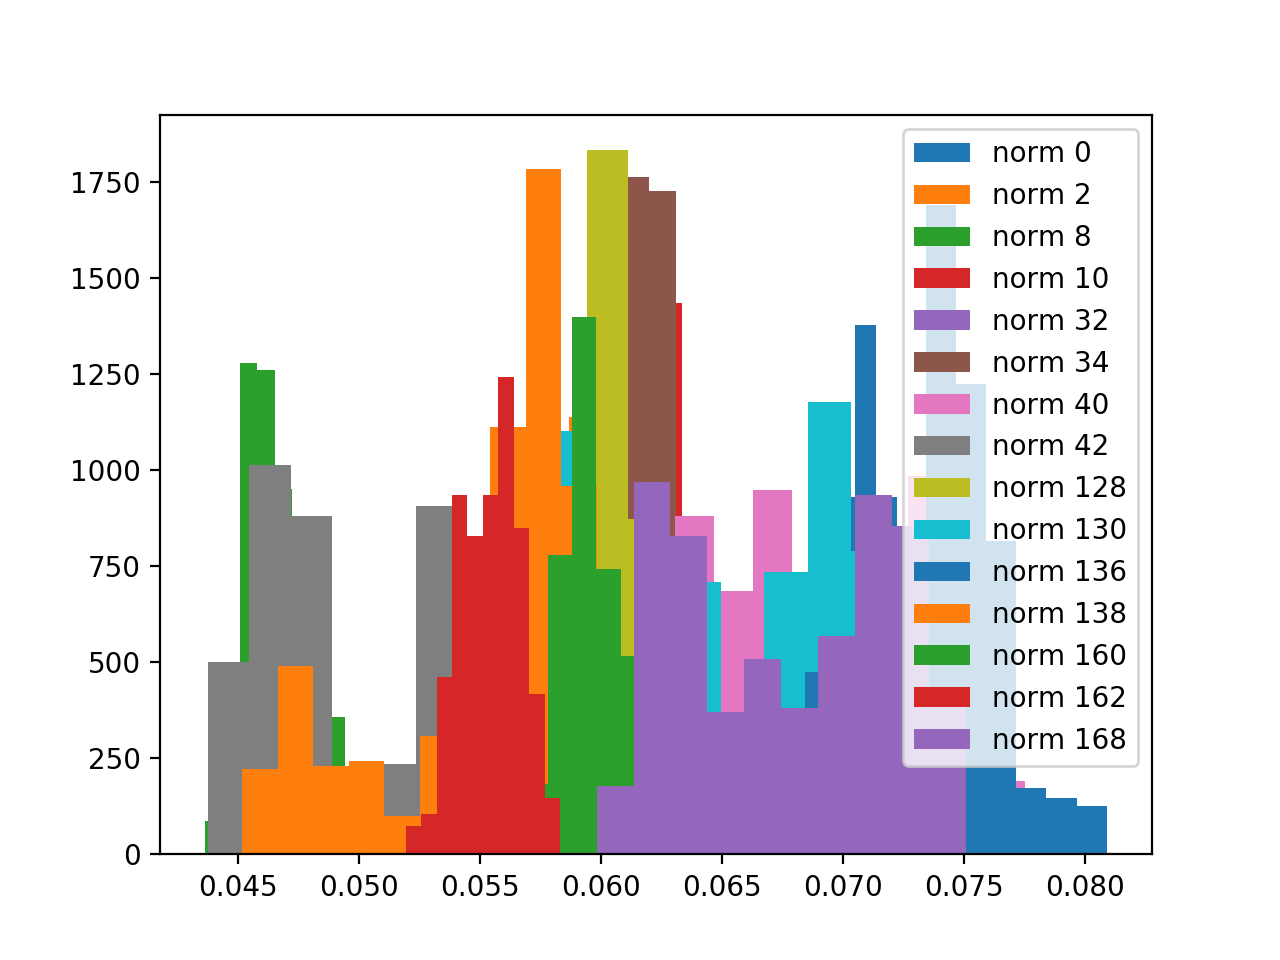

In [17]:
normPropSeries = [[stat[0][i] for stat in stats[4000:]] for i in normInds]
histfig = plt.figure()
for i in range(len(normInds)):
    plt.hist(normPropSeries[i], label = "norm " + str(normInds[i]))
    
plt.legend()
plt.show()

            


In [1]:
defaultParameters = {"PROGRESSVERBOSE" : True,
	"NUMAGENTSPERNORM" : 200,
	"NUMGENERATIONS" : 5000,
	"BATCHSPERAGENT" : 2,
	"BATCHSIZE" : 50,
	"NUMIMITATE" : 430,
	"Eobs" : 0.02,
	"Ecoop" : 0.00,
	"w" : 0.5,
	"ustrat" : 0.00025,
	"utype" : 0.0, #type mutation rate
	"gameBenefit" : 8.0,
	"gameCost" : 1.0,
	"intergroupUpdateP": 0.0,
    "perpetratorNorms" : False,
    "relativeNorms" : True,
    "uvisibility" : 1.0,
    "fixed":"intergroupUpdateP"
}

In [2]:
import julia
J = julia.Julia()
J.include("populationSimulationSimpleController.jl")
# J.include("populationSimulationSimple.jl")
# J.evolve(defaultParameters)

paramDicts = []

for i in range(5):
    myparams = defaultParameters.copy()
    myparams["w"] = 0.01 * i**2
    paramDicts.append(myparams)

print("paramDicts: " + str(paramDicts))    
distributedResults = J.evolveDistributed(paramDicts)
    

paramDicts: [{'PROGRESSVERBOSE': True, 'NUMAGENTSPERNORM': 200, 'NUMGENERATIONS': 5000, 'BATCHSPERAGENT': 2, 'BATCHSIZE': 50, 'NUMIMITATE': 430, 'Eobs': 0.02, 'Ecoop': 0.0, 'w': 0.0, 'ustrat': 0.00025, 'utype': 0.0, 'gameBenefit': 8.0, 'gameCost': 1.0, 'intergroupUpdateP': 0.0, 'perpetratorNorms': False}, {'PROGRESSVERBOSE': True, 'NUMAGENTSPERNORM': 200, 'NUMGENERATIONS': 5000, 'BATCHSPERAGENT': 2, 'BATCHSIZE': 50, 'NUMIMITATE': 430, 'Eobs': 0.02, 'Ecoop': 0.0, 'w': 0.01, 'ustrat': 0.00025, 'utype': 0.0, 'gameBenefit': 8.0, 'gameCost': 1.0, 'intergroupUpdateP': 0.0, 'perpetratorNorms': False}, {'PROGRESSVERBOSE': True, 'NUMAGENTSPERNORM': 200, 'NUMGENERATIONS': 5000, 'BATCHSPERAGENT': 2, 'BATCHSIZE': 50, 'NUMIMITATE': 430, 'Eobs': 0.02, 'Ecoop': 0.0, 'w': 0.04, 'ustrat': 0.00025, 'utype': 0.0, 'gameBenefit': 8.0, 'gameCost': 1.0, 'intergroupUpdateP': 0.0, 'perpetratorNorms': False}, {'PROGRESSVERBOSE': True, 'NUMAGENTSPERNORM': 200, 'NUMGENERATIONS': 5000, 'BATCHSPERAGENT': 2, 'BATCHS

In [27]:
import time
import json

def cacheRuns(results,parameters):
    for i in range(len(results)):
        filename = "./cached/cachedRun" + str(time.time()).replace('.','')
        littleDict = {}
        littleDict["results"] = [(props.tolist(),coop,t0,t1) for props,coop,t0,t1 in results[i][0]]
#         print(results[i][0][:2])
        littleDict["parameters"] = parameters[i]
        with open(filename, "w") as f:
            json.dump(littleDict, f)
            print("Dumped pair " + str(i) + " to filename: " + filename)
            
cacheRuns(distributedResults, paramDicts)

[(array([0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.003

Dumped pair 1 to filename: ./cached/cachedRun15646086328557901
[(array([0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.0039062

Dumped pair 3 to filename: ./cached/cachedRun15646086375587342
[(array([0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.0039062

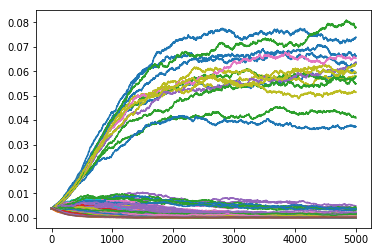

In [22]:
import matplotlib.pyplot as plt
norms = J.NORMS
len(norms)
for i in range(256):
	line = []
	for stat in distributedResults[4][0]:
		line.append(stat[0][i])

	plt.plot(line, label = "norm " + str(i+1))

In [47]:
normInds = [i for i,r in enumerate(distributedResults2[5][2000][0]) if r > 0.03]
print(normInds)
for i in normInds:
    print("Norm " + str(i))
    print(norms[i][0])
    print(norms[i][1])

IndexError: tuple index out of range

In [28]:
paramDicts2 = []

for i in range(16):
    myparams = defaultParameters.copy()
    myparams["w"] = 0.01 * i
    myparams["BATCHSPERAGENT"] = 10
    myparams["BATCHSIZE"] = 10
    myparams["NUMGENERATIONS"] = 10000
    myparams["perpetratorNorms"] = True
    paramDicts2.append(myparams)

print("paramDicts: " + str(paramDicts2))    
distributedResults2 = J.evolveDistributed(paramDicts2)
cacheRuns(distributedResults2, paramDicts2)

paramDicts: [{'PROGRESSVERBOSE': True, 'NUMAGENTSPERNORM': 200, 'NUMGENERATIONS': 10000, 'BATCHSPERAGENT': 10, 'BATCHSIZE': 10, 'NUMIMITATE': 430, 'Eobs': 0.02, 'Ecoop': 0.0, 'w': 0.0, 'ustrat': 0.00025, 'utype': 0.0, 'gameBenefit': 8.0, 'gameCost': 1.0, 'intergroupUpdateP': 0.0, 'perpetratorNorms': True}, {'PROGRESSVERBOSE': True, 'NUMAGENTSPERNORM': 200, 'NUMGENERATIONS': 10000, 'BATCHSPERAGENT': 10, 'BATCHSIZE': 10, 'NUMIMITATE': 430, 'Eobs': 0.02, 'Ecoop': 0.0, 'w': 0.01, 'ustrat': 0.00025, 'utype': 0.0, 'gameBenefit': 8.0, 'gameCost': 1.0, 'intergroupUpdateP': 0.0, 'perpetratorNorms': True}, {'PROGRESSVERBOSE': True, 'NUMAGENTSPERNORM': 200, 'NUMGENERATIONS': 10000, 'BATCHSPERAGENT': 10, 'BATCHSIZE': 10, 'NUMIMITATE': 430, 'Eobs': 0.02, 'Ecoop': 0.0, 'w': 0.02, 'ustrat': 0.00025, 'utype': 0.0, 'gameBenefit': 8.0, 'gameCost': 1.0, 'intergroupUpdateP': 0.0, 'perpetratorNorms': True}, {'PROGRESSVERBOSE': True, 'NUMAGENTSPERNORM': 200, 'NUMGENERATIONS': 10000, 'BATCHSPERAGENT': 10, 'B

Dumped pair 0 to filename: ./cached/cachedRun1564661026765889
[(array([0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625

Dumped pair 2 to filename: ./cached/cachedRun1564661034671031
[(array([0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625

Dumped pair 4 to filename: ./cached/cachedRun15646610424093518
[(array([0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.0039062

Dumped pair 6 to filename: ./cached/cachedRun1564661051147125
[(array([0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625

Dumped pair 8 to filename: ./cached/cachedRun15646610589825861
[(array([0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.0039062

Dumped pair 10 to filename: ./cached/cachedRun1564661066721243
[(array([0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.0039062

Dumped pair 12 to filename: ./cached/cachedRun15646610745434828
[(array([0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.003906

Dumped pair 14 to filename: ./cached/cachedRun1564661082599353
[(array([0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.0039062

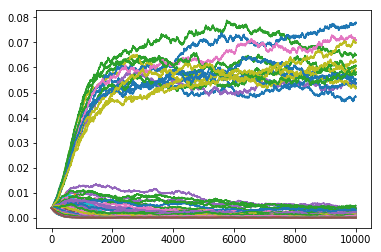

In [34]:
import matplotlib.pyplot as plt
norms = J.NORMS
len(norms)
for i in range(256):
	line = []
	for stat in distributedResults2[15][0]:
		line.append(stat[0][i])

	plt.plot(line, label = "norm " + str(i+1))

In [36]:
paramDicts3 = []
for i in range(4):
    myparams = defaultParameters.copy()
    myparams["NUMAGENTSPERNORM"] = 300
    myparams["BATCHSPERAGENT"] = 4
    myparams["BATCHSIZE"] = 25
    myparams["gameBenefit"] = 8.0 + i * 1.0
    paramDicts3.append(myparams)
    

print("paramDicts: " + str(paramDicts3))    
distributedResults3 = J.evolveDistributed(paramDicts3)
cacheRuns(distributedResults3, paramDicts3)


paramDicts: [{'PROGRESSVERBOSE': True, 'NUMAGENTSPERNORM': 300, 'NUMGENERATIONS': 5000, 'BATCHSPERAGENT': 4, 'BATCHSIZE': 25, 'NUMIMITATE': 430, 'Eobs': 0.02, 'Ecoop': 0.0, 'w': 0.5, 'ustrat': 0.00025, 'utype': 0.0, 'gameBenefit': 8.0, 'gameCost': 1.0, 'intergroupUpdateP': 0.0, 'perpetratorNorms': False}, {'PROGRESSVERBOSE': True, 'NUMAGENTSPERNORM': 300, 'NUMGENERATIONS': 5000, 'BATCHSPERAGENT': 4, 'BATCHSIZE': 25, 'NUMIMITATE': 430, 'Eobs': 0.02, 'Ecoop': 0.0, 'w': 0.5, 'ustrat': 0.00025, 'utype': 0.0, 'gameBenefit': 9.0, 'gameCost': 1.0, 'intergroupUpdateP': 0.0, 'perpetratorNorms': False}, {'PROGRESSVERBOSE': True, 'NUMAGENTSPERNORM': 300, 'NUMGENERATIONS': 5000, 'BATCHSPERAGENT': 4, 'BATCHSIZE': 25, 'NUMIMITATE': 430, 'Eobs': 0.02, 'Ecoop': 0.0, 'w': 0.5, 'ustrat': 0.00025, 'utype': 0.0, 'gameBenefit': 10.0, 'gameCost': 1.0, 'intergroupUpdateP': 0.0, 'perpetratorNorms': False}, {'PROGRESSVERBOSE': True, 'NUMAGENTSPERNORM': 300, 'NUMGENERATIONS': 5000, 'BATCHSPERAGENT': 4, 'BATCHSI

Dumped pair 1 to filename: ./cached/cachedRun1564674947591268
[(array([0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625

Dumped pair 3 to filename: ./cached/cachedRun15646749520839949


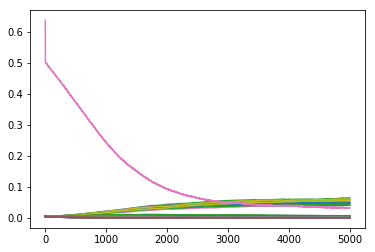

In [56]:
for i in range(256):
	line = []
	for stat in distributedResults3[3][0]:
		line.append(stat[0][i])

	plt.plot(line, label = "norm " + str(i+1))
plt.plot([stat[1] for stat in distributedResults3[0][0]])

In [46]:
#fixed intergroup update p
paramDicts4 = []
for i in range(4):
    myparams = defaultParameters.copy()
    myparams["NUMAGENTSPERNORM"] = 300
#     myparams["BATCHSPERAGENT"] = 4
#     myparams["BATCHSIZE"] = 25
    myparams["gameBenefit"] = 8.0 + i * 1.0
    paramDicts4.append(myparams)
    

print("paramDicts: " + str(paramDicts4))    
distributedResults4 = J.evolveDistributed(paramDicts4)
cacheRuns(distributedResults4, paramDicts4)

paramDicts: [{'PROGRESSVERBOSE': True, 'NUMAGENTSPERNORM': 300, 'NUMGENERATIONS': 5000, 'BATCHSPERAGENT': 2, 'BATCHSIZE': 50, 'NUMIMITATE': 430, 'Eobs': 0.02, 'Ecoop': 0.0, 'w': 0.5, 'ustrat': 0.00025, 'utype': 0.0, 'gameBenefit': 8.0, 'gameCost': 1.0, 'intergroupUpdateP': 0.0, 'perpetratorNorms': False}, {'PROGRESSVERBOSE': True, 'NUMAGENTSPERNORM': 300, 'NUMGENERATIONS': 5000, 'BATCHSPERAGENT': 2, 'BATCHSIZE': 50, 'NUMIMITATE': 430, 'Eobs': 0.02, 'Ecoop': 0.0, 'w': 0.5, 'ustrat': 0.00025, 'utype': 0.0, 'gameBenefit': 9.0, 'gameCost': 1.0, 'intergroupUpdateP': 0.0, 'perpetratorNorms': False}, {'PROGRESSVERBOSE': True, 'NUMAGENTSPERNORM': 300, 'NUMGENERATIONS': 5000, 'BATCHSPERAGENT': 2, 'BATCHSIZE': 50, 'NUMIMITATE': 430, 'Eobs': 0.02, 'Ecoop': 0.0, 'w': 0.5, 'ustrat': 0.00025, 'utype': 0.0, 'gameBenefit': 10.0, 'gameCost': 1.0, 'intergroupUpdateP': 0.0, 'perpetratorNorms': False}, {'PROGRESSVERBOSE': True, 'NUMAGENTSPERNORM': 300, 'NUMGENERATIONS': 5000, 'BATCHSPERAGENT': 2, 'BATCHSI

Dumped pair 1 to filename: ./cached/cachedRun156467798131037
[(array([0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,

Dumped pair 3 to filename: ./cached/cachedRun1564677985883501


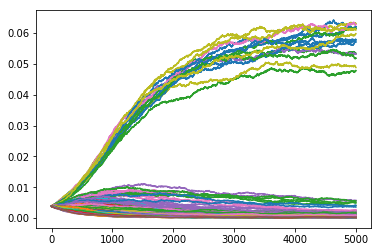

In [60]:
for i in range(256):
	line = []
	for stat in distributedResults4[0][0]:
		line.append(stat[0][i])

	plt.plot(line, label = "norm " + str(i+1))
# plt.plot([stat[1] for stat in distributedResults4[3][0]])

[0, 2, 8, 32, 34, 40, 128, 130, 136, 160, 162, 168]
Norm 0
[[0 0]
 [0 0]]
[[0 0]
 [0 0]]
Norm 2
[[0 0]
 [0 0]]
[[0 1]
 [0 0]]
Norm 8
[[0 0]
 [0 0]]
[[0 0]
 [0 1]]
Norm 32
[[0 1]
 [0 0]]
[[0 0]
 [0 0]]
Norm 34
[[0 1]
 [0 0]]
[[0 1]
 [0 0]]
Norm 40
[[0 1]
 [0 0]]
[[0 0]
 [0 1]]
Norm 128
[[0 0]
 [0 1]]
[[0 0]
 [0 0]]
Norm 130
[[0 0]
 [0 1]]
[[0 1]
 [0 0]]
Norm 136
[[0 0]
 [0 1]]
[[0 0]
 [0 1]]
Norm 160
[[0 1]
 [0 1]]
[[0 0]
 [0 0]]
Norm 162
[[0 1]
 [0 1]]
[[0 1]
 [0 0]]
Norm 168
[[0 1]
 [0 1]]
[[0 0]
 [0 1]]


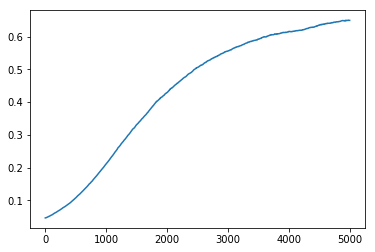

In [69]:
normInds41 = [i for i,r in enumerate(distributedResults4[3][0][2000][0].tolist()) if r > 0.03]
print(normInds41)
for i in normInds41:
    print("Norm " + str(i))
    print(norms[i][0])
    print(norms[i][1])

cumulative41 = [sum([distributedResults4[3][0][j][0][i] for i in normInds41]) for j in range(len(distributedResults4[3][0]))]

plt.plot(cumulative41)

In [63]:
distributedResults4[1][0][2000]

(array([0.04326823, 0.00588542, 0.03735677, 0.0039974 , 0.00764323,
        0.00286458, 0.00699219, 0.00153646, 0.04498698, 0.00325521,
        0.04022135, 0.00230469, 0.00727865, 0.00148438, 0.00334635,
        0.00109375, 0.00429688, 0.00208333, 0.0028125 , 0.00114583,
        0.00207031, 0.00143229, 0.0014974 , 0.00102865, 0.00419271,
        0.00143229, 0.00186198, 0.0009375 , 0.00169271, 0.00111979,
        0.00105469, 0.00049479, 0.03588542, 0.00263021, 0.04386719,
        0.00145833, 0.00751302, 0.00157552, 0.00251302, 0.00078125,
        0.03916667, 0.00186198, 0.03440104, 0.00088542, 0.00451823,
        0.00108073, 0.00113281, 0.0003125 , 0.00175781, 0.00117187,
        0.00098958, 0.00063802, 0.00179688, 0.00089844, 0.00088542,
        0.0006901 , 0.00183594, 0.00071615, 0.00058594, 0.0006901 ,
        0.00148438, 0.00052083, 0.00029948, 0.00040365, 0.00964844,
        0.00259115, 0.00627604, 0.0016276 , 0.00414063, 0.00164062,
        0.00197917, 0.00117187, 0.00994792, 0.00

In [70]:
#fixed intergroup update p
paramDicts5 = []
for i in range(4):
    myparams = defaultParameters.copy()
#     myparams["NUMAGENTSPERNORM"] = 300
#     myparams["BATCHSPERAGENT"] = 4
#     myparams["BATCHSIZE"] = 25
    myparams["gameBenefit"] = 8.0
    paramDicts5.append(myparams)
    

print("paramDicts: " + str(paramDicts5))    
distributedResults5 = J.evolveDistributed(paramDicts5)
cacheRuns(distributedResults5, paramDicts5)

paramDicts: [{'PROGRESSVERBOSE': True, 'NUMAGENTSPERNORM': 200, 'NUMGENERATIONS': 5000, 'BATCHSPERAGENT': 2, 'BATCHSIZE': 50, 'NUMIMITATE': 430, 'Eobs': 0.02, 'Ecoop': 0.0, 'w': 0.5, 'ustrat': 0.00025, 'utype': 0.0, 'gameBenefit': 8.0, 'gameCost': 1.0, 'intergroupUpdateP': 0.0, 'perpetratorNorms': False}, {'PROGRESSVERBOSE': True, 'NUMAGENTSPERNORM': 200, 'NUMGENERATIONS': 5000, 'BATCHSPERAGENT': 2, 'BATCHSIZE': 50, 'NUMIMITATE': 430, 'Eobs': 0.02, 'Ecoop': 0.0, 'w': 0.5, 'ustrat': 0.00025, 'utype': 0.0, 'gameBenefit': 8.0, 'gameCost': 1.0, 'intergroupUpdateP': 0.0, 'perpetratorNorms': False}, {'PROGRESSVERBOSE': True, 'NUMAGENTSPERNORM': 200, 'NUMGENERATIONS': 5000, 'BATCHSPERAGENT': 2, 'BATCHSIZE': 50, 'NUMIMITATE': 430, 'Eobs': 0.02, 'Ecoop': 0.0, 'w': 0.5, 'ustrat': 0.00025, 'utype': 0.0, 'gameBenefit': 8.0, 'gameCost': 1.0, 'intergroupUpdateP': 0.0, 'perpetratorNorms': False}, {'PROGRESSVERBOSE': True, 'NUMAGENTSPERNORM': 200, 'NUMGENERATIONS': 5000, 'BATCHSPERAGENT': 2, 'BATCHSIZ

Dumped pair 1 to filename: ./cached/cachedRun1564763965177514
[(array([0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625

Dumped pair 3 to filename: ./cached/cachedRun1564763969377601


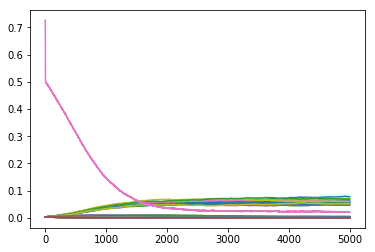

In [75]:
for i in range(256):
	line = []
	for stat in distributedResults5[3][0]:
		line.append(stat[0][i])

	plt.plot(line, label = "norm " + str(i+1))
plt.plot([stat[1] for stat in distributedResults5[3][0]])

[0, 2, 8, 10, 32, 34, 40, 42, 128, 130, 136, 138, 160, 162, 168]
Norm 0
[[0 0]
 [0 0]]
[[0 0]
 [0 0]]
Norm 2
[[0 0]
 [0 0]]
[[0 1]
 [0 0]]
Norm 8
[[0 0]
 [0 0]]
[[0 0]
 [0 1]]
Norm 10
[[0 0]
 [0 0]]
[[0 1]
 [0 1]]
Norm 32
[[0 1]
 [0 0]]
[[0 0]
 [0 0]]
Norm 34
[[0 1]
 [0 0]]
[[0 1]
 [0 0]]
Norm 40
[[0 1]
 [0 0]]
[[0 0]
 [0 1]]
Norm 42
[[0 1]
 [0 0]]
[[0 1]
 [0 1]]
Norm 128
[[0 0]
 [0 1]]
[[0 0]
 [0 0]]
Norm 130
[[0 0]
 [0 1]]
[[0 1]
 [0 0]]
Norm 136
[[0 0]
 [0 1]]
[[0 0]
 [0 1]]
Norm 138
[[0 0]
 [0 1]]
[[0 1]
 [0 1]]
Norm 160
[[0 1]
 [0 1]]
[[0 0]
 [0 0]]
Norm 162
[[0 1]
 [0 1]]
[[0 1]
 [0 0]]
Norm 168
[[0 1]
 [0 1]]
[[0 0]
 [0 1]]


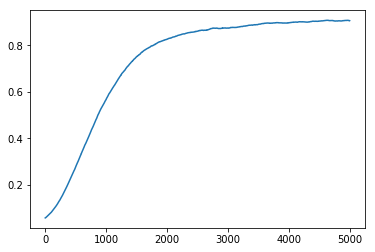

In [76]:
normInds50 = [i for i,r in enumerate(distributedResults5[0][0][2000][0].tolist()) if r > 0.03]
print(normInds50)
for i in normInds50:
    print("Norm " + str(i))
    print(norms[i][0])
    print(norms[i][1])

cumulative50 = [sum([distributedResults5[0][0][j][0][i] for i in normInds50]) for j in range(len(distributedResults5[0][0]))]

plt.plot(cumulative50)

In [ ]:
#fixed intergroup update p
paramDicts6 = []
for i in range(4):
    myparams = defaultParameters.copy()
#     myparams["NUMAGENTSPERNORM"] = 300
#     myparams["BATCHSPERAGENT"] = 4
#     myparams["BATCHSIZE"] = 25
#     myparams["gameBenefit"] = 8.0
    myparams["uvisibility"] = 0.25 * i
    paramDicts6.append(myparams)
    

print("paramDicts: " + str(paramDicts6))    
distributedResults6 = J.evolveDistributed(paramDicts6)
cacheRuns(distributedResults6, paramDicts6)